# Linear Regression

## Import Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [112]:
insurance = pd.read_csv('insurance.csv')
print(insurance)

      X      Y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
5    57  170.9
6    23   56.9
7    14   77.5
8    45  214.0
9    10   65.3
10    5   20.9
11   48  248.1
12   11   23.5
13   23   39.6
14    7   48.8
15    2    6.6
16   24  134.9
17    6   50.9
18    3    4.4
19   23  113.0
20    6   14.8
21    9   48.7
22    9   52.1
23    3   13.2
24   29  103.9
25    7   77.5
26    4   11.8
27   20   98.1
28    7   27.9
29    4   38.1
..  ...    ...
33    5   40.3
34   22  161.5
35   11   57.2
36   61  217.6
37   12   58.1
38    4   12.6
39   16   59.6
40   13   89.9
41   60  202.4
42   41  181.3
43   37  152.8
44   55  162.8
45   41   73.4
46   11   21.3
47   27   92.6
48    8   76.1
49    3   39.9
50   17  142.1
51   13   93.0
52   13   31.9
53   15   32.1
54    8   55.6
55   29  133.3
56   30  194.5
57   24  137.9
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5

[63 rows x 2 columns]


In [98]:
insurance.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [99]:
insurance.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [100]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


## Data Visualization

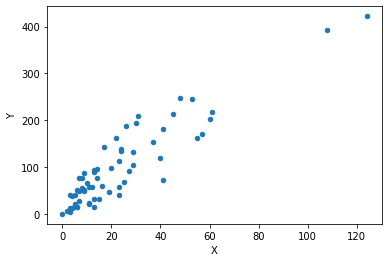

In [101]:
# Draw a scatterplot for insurance dataset
insurance.plot.scatter(x='X',y='Y')

This tutorial is broken down into the following parts:

- Calculate Mean and Variance.
- Calculate Covariance.
- Estimate Coefficients.
- Split Dataset.
- Make Predictions.
- Calculate Error.
- Predict Insurance.

These steps will give you the foundation you need to implement and train simple linear regression models for your own prediction problems.

## Calculate Mean and Variance 

In [102]:
# Calculate the mean value of a list of numbers
def mean(values):
    return np.mean(values)

# Calculate the variance of a list of numbers
def variance(values, mean):
    s=0
    for i in values:
        s= s + (i-mean)**2
    return s

# Check your mean and variance functions
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
x_mean, y_mean = mean(x), mean(y)
x_var, y_var = variance(x, x_mean), variance(y, y_mean)
print('x stats: mean=%.3f variance=%.3f' % (x_mean, x_var)) # Should give mean=3 variance=10 
print('y stats: mean=%.3f variance=%.3f' % (y_mean, y_var)) # Should give mean=2.8 variance=8.8

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


## Calculate Covariance

In [103]:
# Calculate covariance between x and y
def covariance(x, x_mean, y, y_mean):
    n=len(x)
    si=0
    for i in range(n):
        si=si + (x[i]-x_mean)*(y[i]-y_mean);
    return si


# Check your covariance function
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
x_mean, y_mean = mean(x), mean(y)
covar = covariance(x, x_mean, y, y_mean)
print('Covariance: %.3f' % (covar))  # Should give covariance=8

Covariance: 8.000


## Estimate Coefficients 

In [104]:
# Calculate coefficients
def coefficients(dataset):
    print(dataset)
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x,x_mean,y,y_mean)/variance(x,x_mean)
    b0 = mean(y)-b1*mean(x)
    return [b0, b1]


# Check your coefficients function
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: b0=%.3f, b1=%.3f' %(b0, b1))  # Should give b0=0.4 and b1=0.8

[[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
Coefficients: b0=0.400, b1=0.800


## Split Dataset

In [105]:
# Split a dataset into a train and test set (without sci-kit learn)
def train_test_split(dataset, split):
    indices=list(range(len(dataset)))
    t_inst = int(split*len(dataset))
    np.random.shuffle(indices)
    train_data = indices[:t_inst]
    test_data = indices[t_inst:]
    return [train_data,test_data]

In [116]:
train_test_split(insurance,0.7)[0]

[26,
 13,
 43,
 18,
 52,
 24,
 17,
 45,
 46,
 58,
 49,
 59,
 16,
 56,
 39,
 41,
 38,
 3,
 21,
 29,
 10,
 35,
 14,
 44,
 28,
 50,
 6,
 0,
 1,
 23,
 4,
 22,
 54,
 42,
 37,
 12,
 32,
 19,
 30,
 8,
 31,
 25,
 48,
 2]

## Make Predictions

In [106]:
# Use simple linear regression to return predictions on test set.
def simple_linear_regression(train, test):
    b0, b1 = coefficients(train)
    predicted = b0+b1*test
    return predicted

## Calculate Error

In [107]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    n=len(actual)
    s=0
    for i in range (n):
        s = s + (actual[i]-predicted[i])**2
    return s

## Predict Insurance

In [108]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, error_metric, *args):
    train, test = train_test_split(dataset,split)
    predicted =algorithm(train,test)
    error = error_metric(test,predicted)
    return error

In [111]:
# Find rmse for Insurance dataset
split = 0.7
rmse = evaluate_algorithm(insurance,simple_linear_regression,split,rmse_metric)
print('RMSE: %.3f' % (rmse))

[53, 38, 24, 28, 36, 7, 41, 52, 51, 32, 54, 21, 1, 26, 60, 49, 13, 8, 39, 31, 58, 5, 40, 27, 59, 20, 4, 3, 42, 29, 62, 14, 10, 37, 47, 46, 50, 12, 0, 56, 35, 61, 9, 25]


TypeError: 'int' object is not subscriptable